In [25]:
import numpy as np 
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
#importing the visualisation libraries

df = pd.read_csv("../data/Student_performance_data.csv")
#Loading the data

df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [26]:
df.info()
#Here we see that there are no null values that we need to eliminate and that most of the variables are floating point or numbers of some sort

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [27]:
# Drop the redundant StudentID feature
df=df.drop(columns=["StudentID"])
# Perapring the data - add the mask to transform the categorical features
    # Replace values of categorical features that are encoded in numerical format ~ 0-4 
    # Add a mask to transform the categorical features
df['Gender'] = df['Gender'].replace({0: 'Male', 1: 'Female'})
df['Ethnicity'] = df['Ethnicity'].replace({0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'})
df['ParentalEducation'] = df['ParentalEducation'].replace({0: 'None', 1: 'High School', 2: 'Some College', 3: 'Bachelors', 4: 'Higher Study'})
df['ParentalSupport'] = df['ParentalSupport'].replace({0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High', 4: 'Very High'})
df['GradeClass'] = df.apply(lambda row:'A' if (row['GPA']>=3.5) else 'B' if(row['GPA']<3.5 and row['GPA']>=3) else 'C' if(row['GPA']<3 and row['GPA']>=2.5) else 'D' if(row['GPA']<2.5 and row['GPA']>=2.0) else 'F', axis=1)
# Add a mask to transform the categorical features
# Replace values of categorical features that are not encoded
df['Tutoring'] = df['Tutoring'].replace({0: 'No', 1: 'Yes'})
df['Extracurricular'] = df['Extracurricular'].replace({0: 'No', 1: 'Yes'})
df['Sports'] = df['Sports'].replace({0: 'No', 1: 'Yes'})
df['Music'] = df['Music'].replace({0: 'No', 1: 'Yes'})
df['Volunteering'] = df['Volunteering'].replace({0: 'No', 1: 'Yes'})
df.head(8)

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,Female,Caucasian,Some College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,C
1,18,Male,Caucasian,High School,15.408756,0,No,Low,No,No,No,No,3.042915,B
2,15,Male,Asian,Bachelors,4.210570,26,No,Moderate,No,No,No,No,0.112602,F
3,17,Female,Caucasian,Bachelors,10.028829,14,No,High,Yes,No,No,No,2.054218,D
4,17,Female,Caucasian,Some College,4.672495,17,Yes,High,No,No,No,No,1.288061,F
5,18,Male,Caucasian,High School,8.191219,0,No,Low,Yes,No,No,No,3.084184,B
6,15,Male,African American,High School,15.601680,10,No,High,No,Yes,No,No,2.748237,C
7,15,Female,African American,Higher Study,15.424496,22,Yes,Low,Yes,No,No,No,1.360143,F


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
GPA,2392.0,1.906186,0.915156,0.000000,1.174803,1.893393,2.622216,4.000000


In [29]:
df_duplicates = df[df.duplicated()]
print(df_duplicates)
# The are no duplicates that could skew the data

# Drop rows and columns that are completely null
df = df.dropna(how='all')  # Drop rows that are all NaN
df = df.dropna(axis=1, how='all')  # Drop columns that are all NaN

# Fill missing numeric values with mean, categorical with mode
for column in df.columns:

    # Boolean to calculate the sum of all null columns found
    if df[column].isnull().sum() > 0:

        # Boolean to check if column datatype is float64 or int64
        if df[column].dtype in ['float64', 'int64']:

            # Fills columns with mean
            df[column] = df[column].fillna(df[column].mean())
        else:

            # Fills columns with mode
            df[column] = df[column].fillna(df[column].mode()[0])

    # Drops duplicate rows
    df = df.drop_duplicates()


Empty DataFrame
Columns: [Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


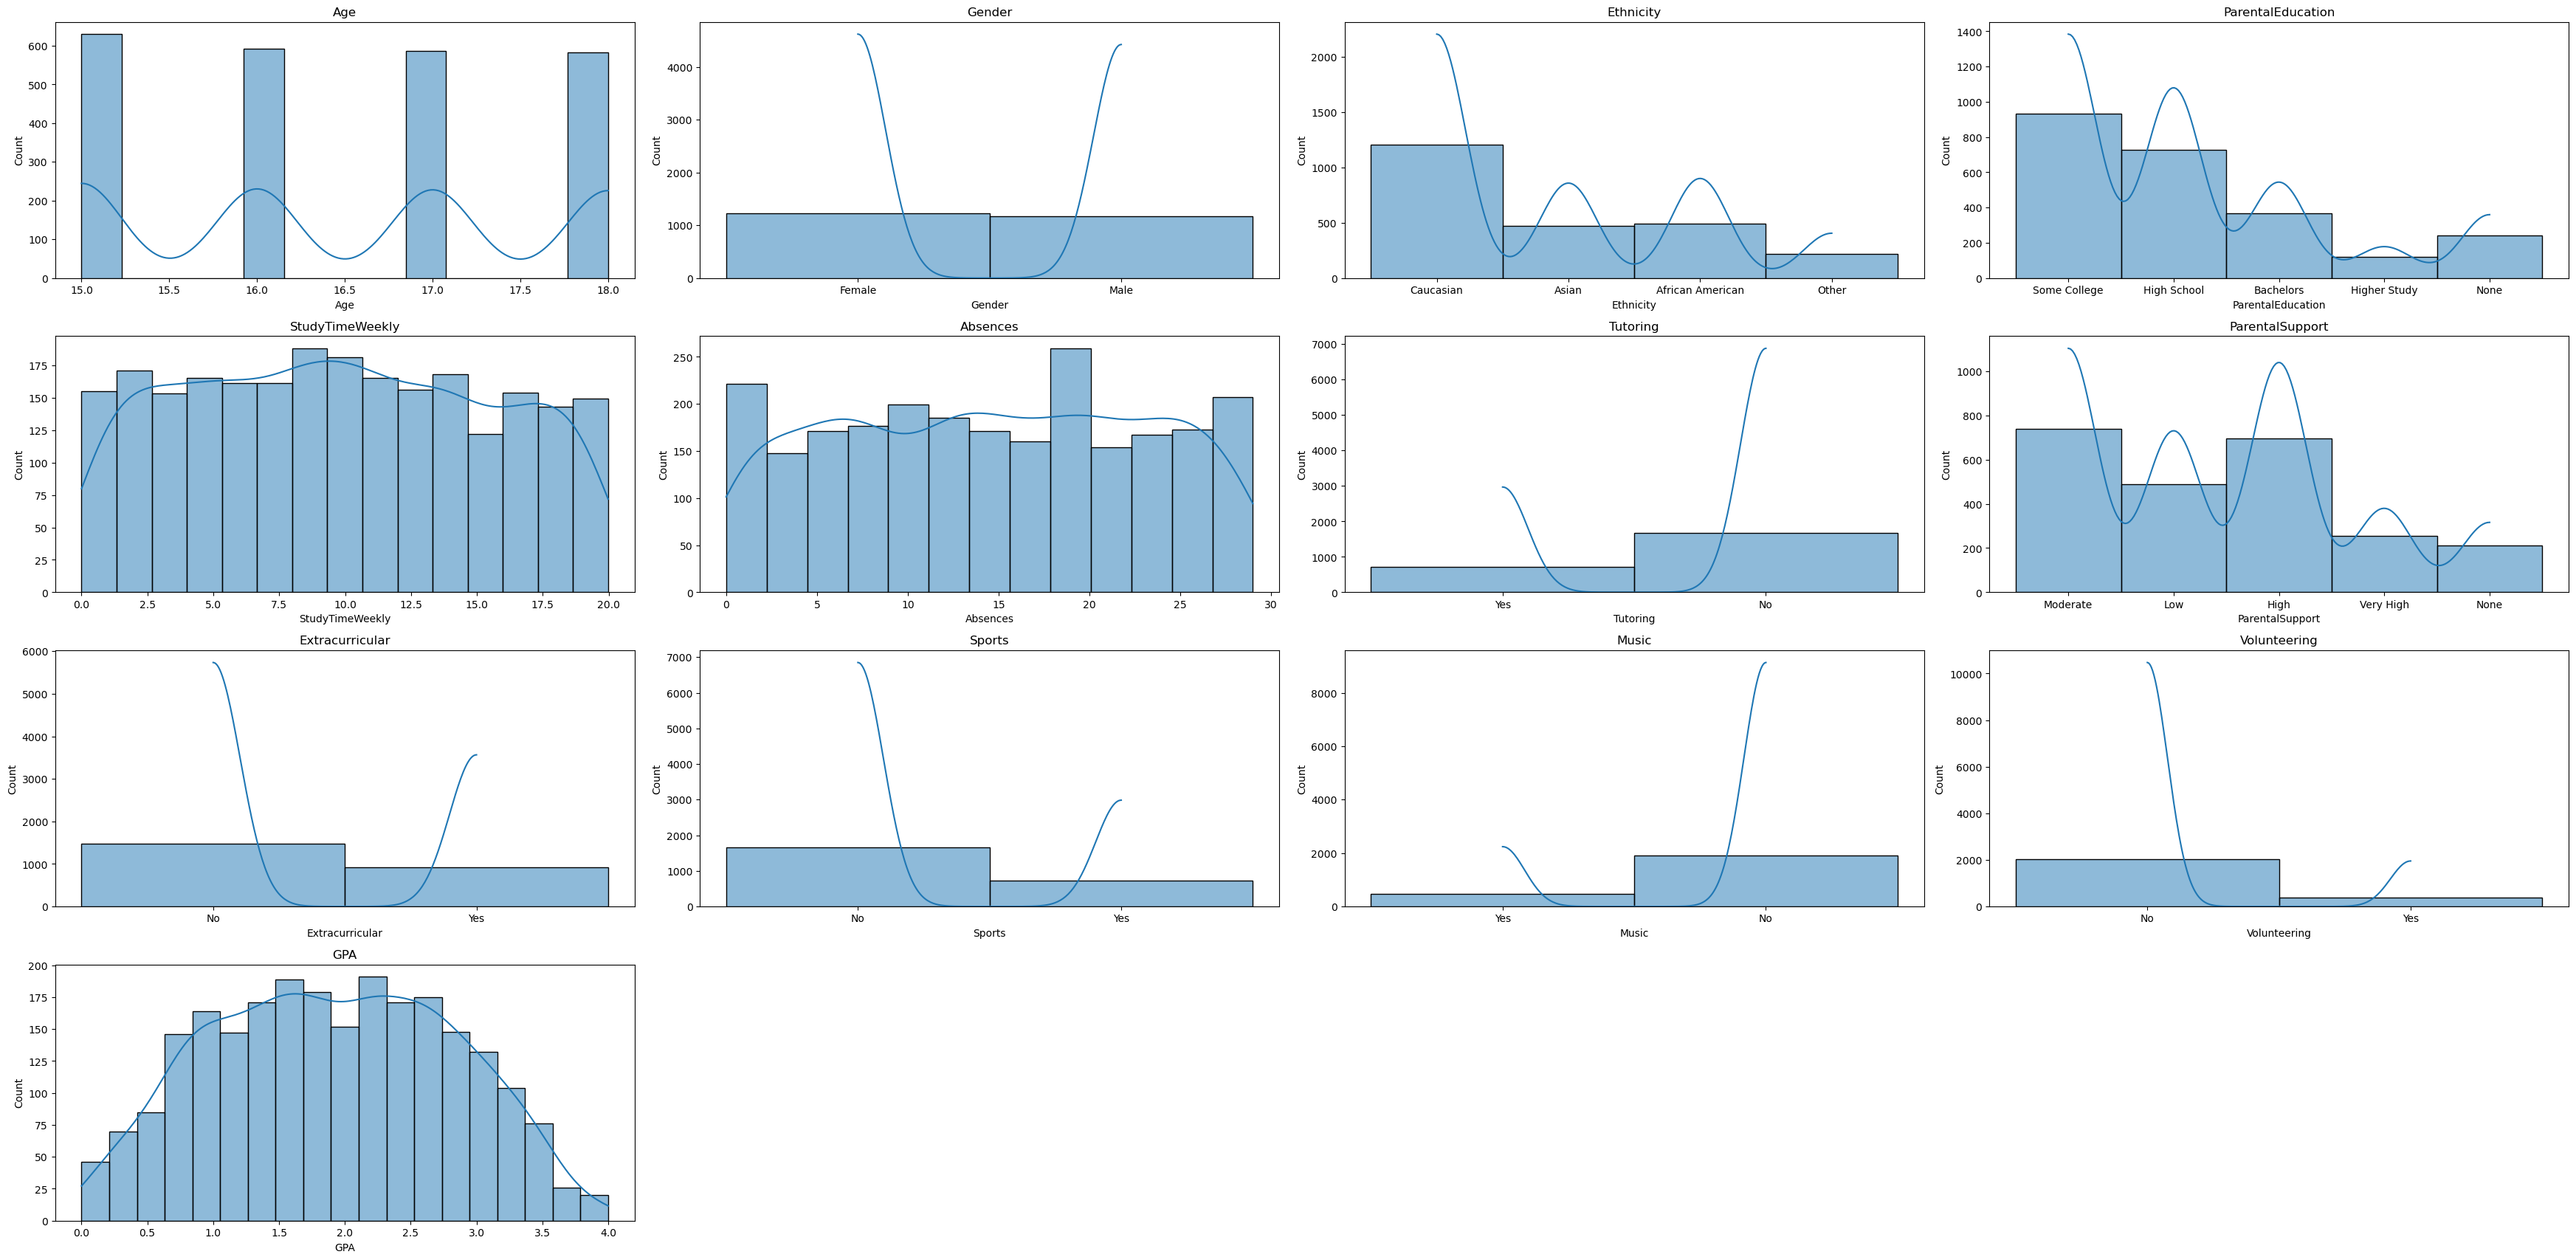

In [30]:
#Looking at the distribution of the features
output_Var = "GradeClass"
features = df.columns.drop(output_Var).tolist()
plt.figure(figsize=(35, 21))
for i, col in enumerate(features):
    plt.subplot(5, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Isolating the numeric feaatures
output_var = 'GradeClass'
numeric_data = df.select_dtypes(include=['number']).columns.tolist()
numeric_features = [col for col in numeric_data if col != output_var]

# Isolating the categorical features
numeric_data = df.select_dtypes(include=['number']).columns.tolist()
#splitting the output variable from our features and dropping the unique identifier

print(categorical_features)
print(scalar_features)

['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
['StudyTimeWeekly', 'Absences']


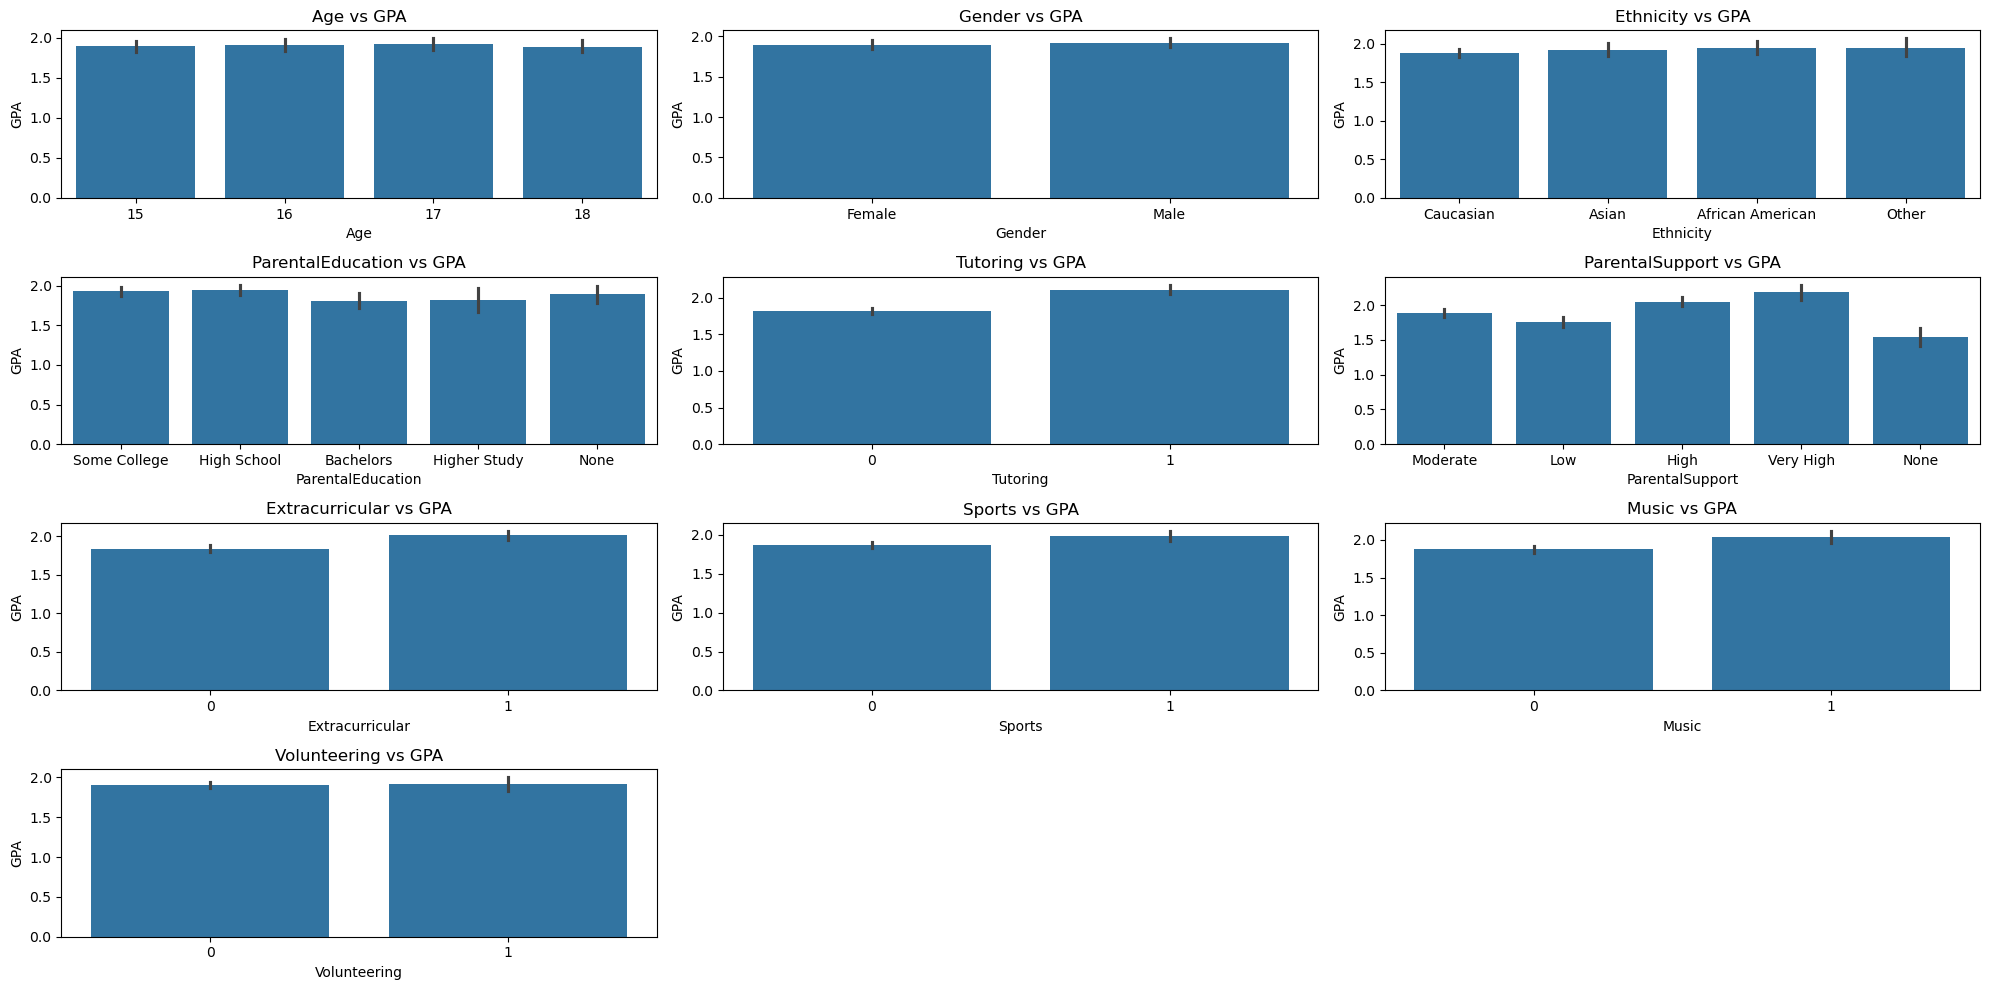

In [9]:
#Looking at the distribution of the features
# selecting categorical features
# plotting the bar plots for each of the categorical features
plt.figure(figsize=(20, 10))
j=0
for i in categorical_features:
    plt.subplot(4, 3, j+1)
    sns.barplot(x=i, y="GPA", data=df2)
    plt.title(f"{i} vs GPA")
    j+=1
plt.tight_layout()
plt.show()

#From the barplots there could be pointed out that Gender and Volunteering have are more equally split atributes and could have an minimal impact on the GPA

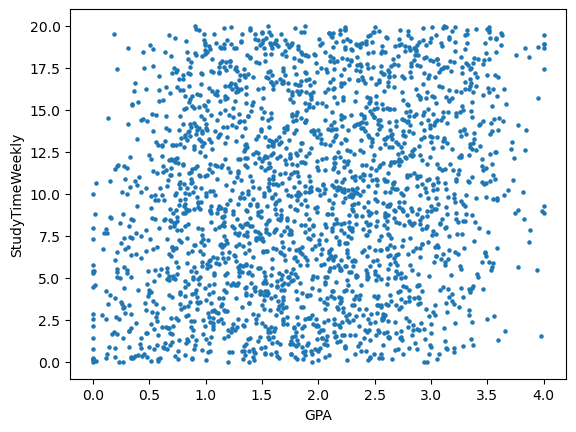

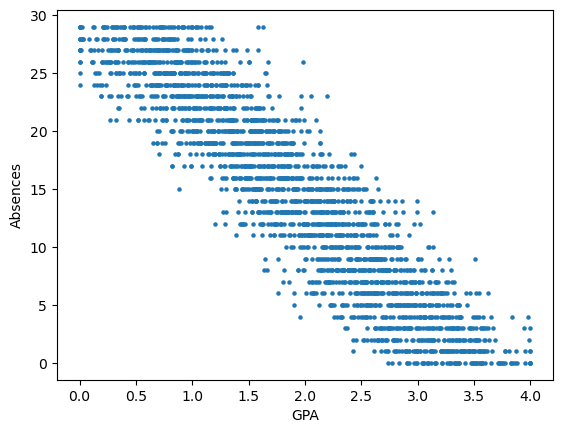

In [10]:
# Examining the relationship between the scalar features and the GPA

ScatterPlot_time_Studying = df2.plot.scatter(x= "GPA", y = "StudyTimeWeekly", s = 5)
ScatterPlot_absences = df2.plot.scatter(x= "GPA", y = "Absences", s = 5)

#There doesn't seem to be a strong relationship between study time and GPA but there does seem to be a moderate negetive linear trend that connects total Absences to GPA

# Time studying seems to have no relationship to the GPA of the student
# The absence seems to have an linear correlation with the GPA

In [11]:
# Lets look at the box-plots for the scalar values
plt.Figure(figsize=(3,4))
for col in scalar_features:
    fig = px.box(data_frame=df[scalar_features], x=col, title=f'BoxPlot for {col} -feature')
    fig.update_layout(xaxis_title=f'{col} Feature')
    fig.show()
# There are no outliers in the data

In [12]:
# Applying feature Engineering to the data, then add the 3 new columns to the DataFrame

df3 = df2
# The 1st feature is to determine if the student outside activities are productive
df3['Constructive_Extracurricular'] = df3.apply(lambda row: row['Extracurricular'] or ((row['Sports'] or row['Music']) or row['Volunteering']), axis=1)
# The 2nd feature is to determine if a student is receiving support in their school life
limiting_performance = ['None', 'Low', 'Moderate']
df3['Receives_Support'] = df3.apply(lambda row:0 if ((row['Tutoring'] == 0) and (row['ParentalSupport'] in limiting_performance)) else 1, axis=1)
# The 3rd is to determine the amount of study hours the student is busy catching up on work perweek
weeks_in_a_year = 52
df3['Catch_up_study_hours'] = df3.apply(lambda row: np.round(row['StudyTimeWeekly'] ** ((row['Absences'] / weeks_in_a_year)),2), axis=1)

df3.head(10)



,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,Constructive_Extracurricular,Receives_Support,Catch_up_study_hours
0,17,Female,Caucasian,Some College,19.833723,7,1,Moderate,0,0,1,0,2.929196,1,1,1.50
1,18,Male,Caucasian,High School,15.408756,0,0,Low,0,0,0,0,3.042915,0,0,1.00
2,15,Male,Asian,Bachelors,4.210570,26,0,Moderate,0,0,0,0,0.112602,0,0,2.05
3,17,Female,Caucasian,Bachelors,10.028829,14,0,High,1,0,0,0,2.054218,1,1,1.86
4,17,Female,Caucasian,Some College,4.672495,17,1,High,0,0,0,0,1.288061,0,1,1.66
5,18,Male,Caucasian,High School,8.191219,0,0,Low,1,0,0,0,3.084184,1,0,1.00
6,15,Male,African American,High School,15.601680,10,0,High,0,1,0,0,2.748237,1,1,1.70
7,15,Female,African American,Higher Study,15.424496,22,1,Low,1,0,0,0,1.360143,1,1,3.18
8,17,Male,Caucasian,None,4.562008,1,0,Moderate,0,1,0,1,2.896819,1,0,1.03
9,16,Female,Caucasian,High School,18.444466,0,0,High,1,0,0,0,3.573474,1,1,1.00


In [13]:
# Encoding then catagorical features in the dataset, then scaling the numeric features ~ using One Hot
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(
    use_cat_names=True, 
    cols=['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport']
)
# Transform data
df_transformed = ohe.fit_transform(df3)
# Scale Scalar data
scaler = StandardScaler()
scalar_features = df3.columns.drop(["Age", "Gender", "Ethnicity", "ParentalEducation", "ParentalSupport", "Tutoring", "Extracurricular", "Sports", "Music", "Volunteering", "Constructive_Extracurricular", "Receives_Support"])
# update the cols with their normalized values
scaler.fit(df_transformed[scalar_features])
df_transformed[scalar_features] = scaler.transform(df_transformed[scalar_features])

df_transformed.head(10)



,Age_17.0,Age_18.0,Age_15.0,Age_16.0,Gender_Female,Gender_Male,Ethnicity_Caucasian,Ethnicity_Asian,Ethnicity_African American,Ethnicity_Other,...,ParentalSupport_Very High,ParentalSupport_None,Extracurricular,Sports,Music,Volunteering,GPA,Constructive_Extracurricular,Receives_Support,Catch_up_study_hours
0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1.118086,1,1,-0.464417
1,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1.242374,0,0,-1.004039
2,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,-1.960277,0,0,0.129166
3,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0.161790,1,1,-0.075890
4,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,-0.675573,0,1,-0.291739
5,0,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,1.287479,1,0,-1.004039
6,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0.920310,1,1,-0.248569
7,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,-0.596792,1,1,1.348711
8,1,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,1,1.082701,1,0,-0.971662
9,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,1.822243,1,1,-1.004039


<class 'pandas.core.frame.DataFrame'>
Index: 2368 entries, 0 to 2391
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age_17.0                        2368 non-null   int64  
 1   Age_18.0                        2368 non-null   int64  
 2   Age_15.0                        2368 non-null   int64  
 3   Age_16.0                        2368 non-null   int64  
 4   Gender_Female                   2368 non-null   int64  
 5   Gender_Male                     2368 non-null   int64  
 6   Ethnicity_Caucasian             2368 non-null   int64  
 7   Ethnicity_Asian                 2368 non-null   int64  
 8   Ethnicity_African American      2368 non-null   int64  
 9   Ethnicity_Other                 2368 non-null   int64  
 10  ParentalEducation_Some College  2368 non-null   int64  
 11  ParentalEducation_High School   2368 non-null   int64  
 12  ParentalEducation_Bachelors     2368 no

None

AssertionError: 3

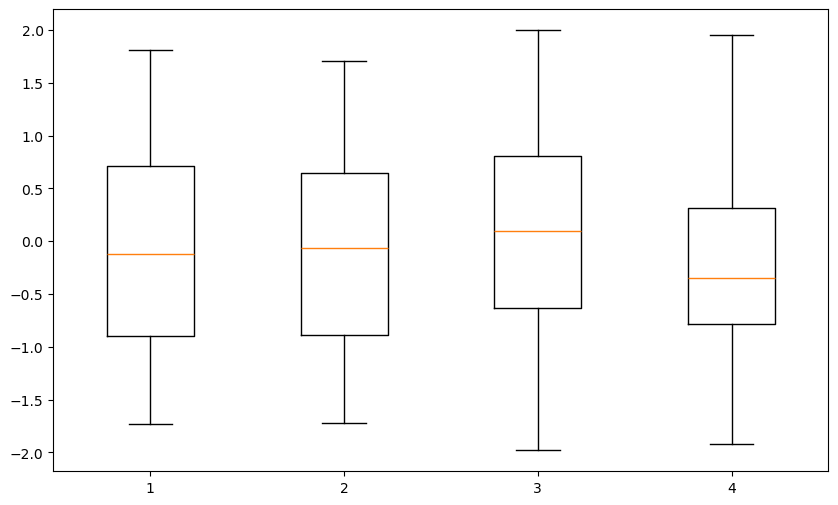

In [15]:
# Cleaning the transformed data
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(df_transformed)
df_cleaned = df_transformed[outliers == 1]
display(df_cleaned.info())


z_scores = df_cleaned[scalar_features].apply(zscore)
df_cleaned = df_cleaned[(abs(z_scores) < 2).all(axis=1)]

# Check the transformed numeric features
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df_cleaned[scalar_features].boxplot(vert = 0, ax=ax)  
_ = ax.set_title(f'Box Plot: Cleaned Data')




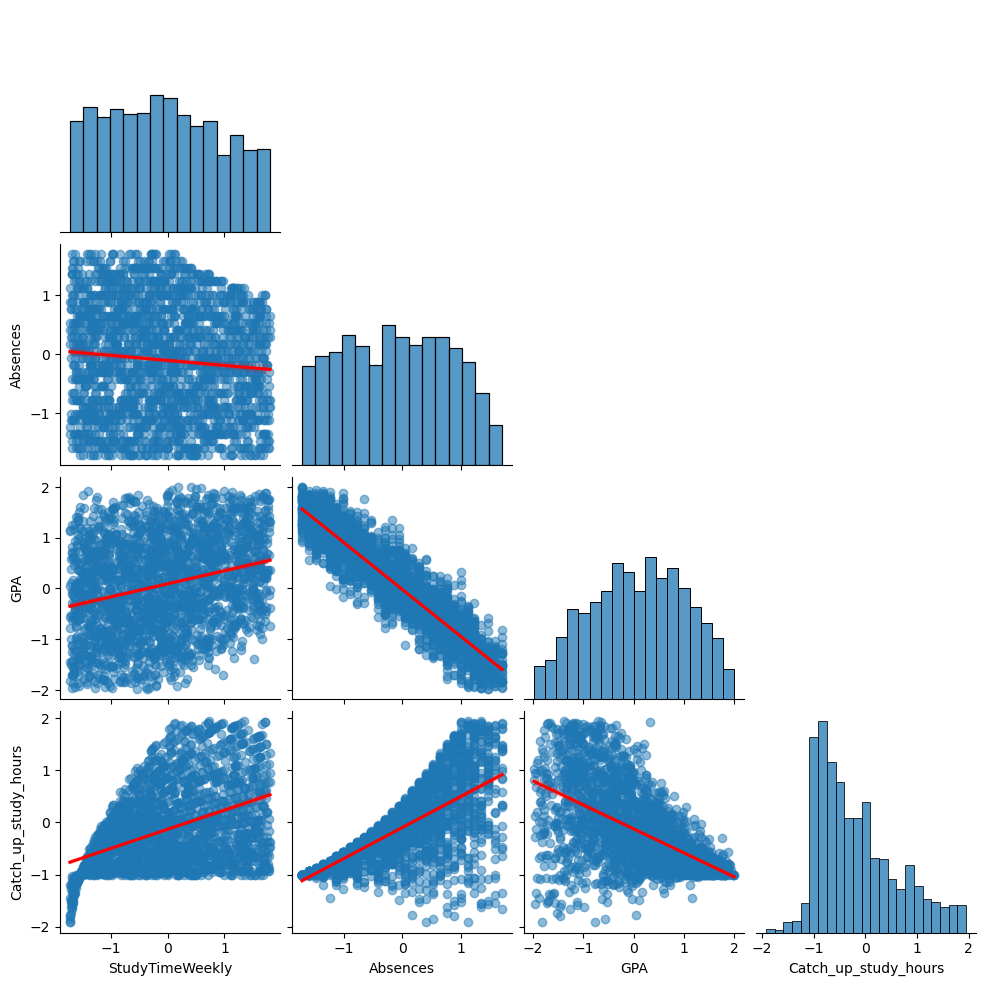

In [16]:
# Viewing the correlation between numeric data
_ = sns.pairplot(data = df_cleaned[scalar_features], 
                 corner = True, 
                 kind='reg',
                 plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.5}})

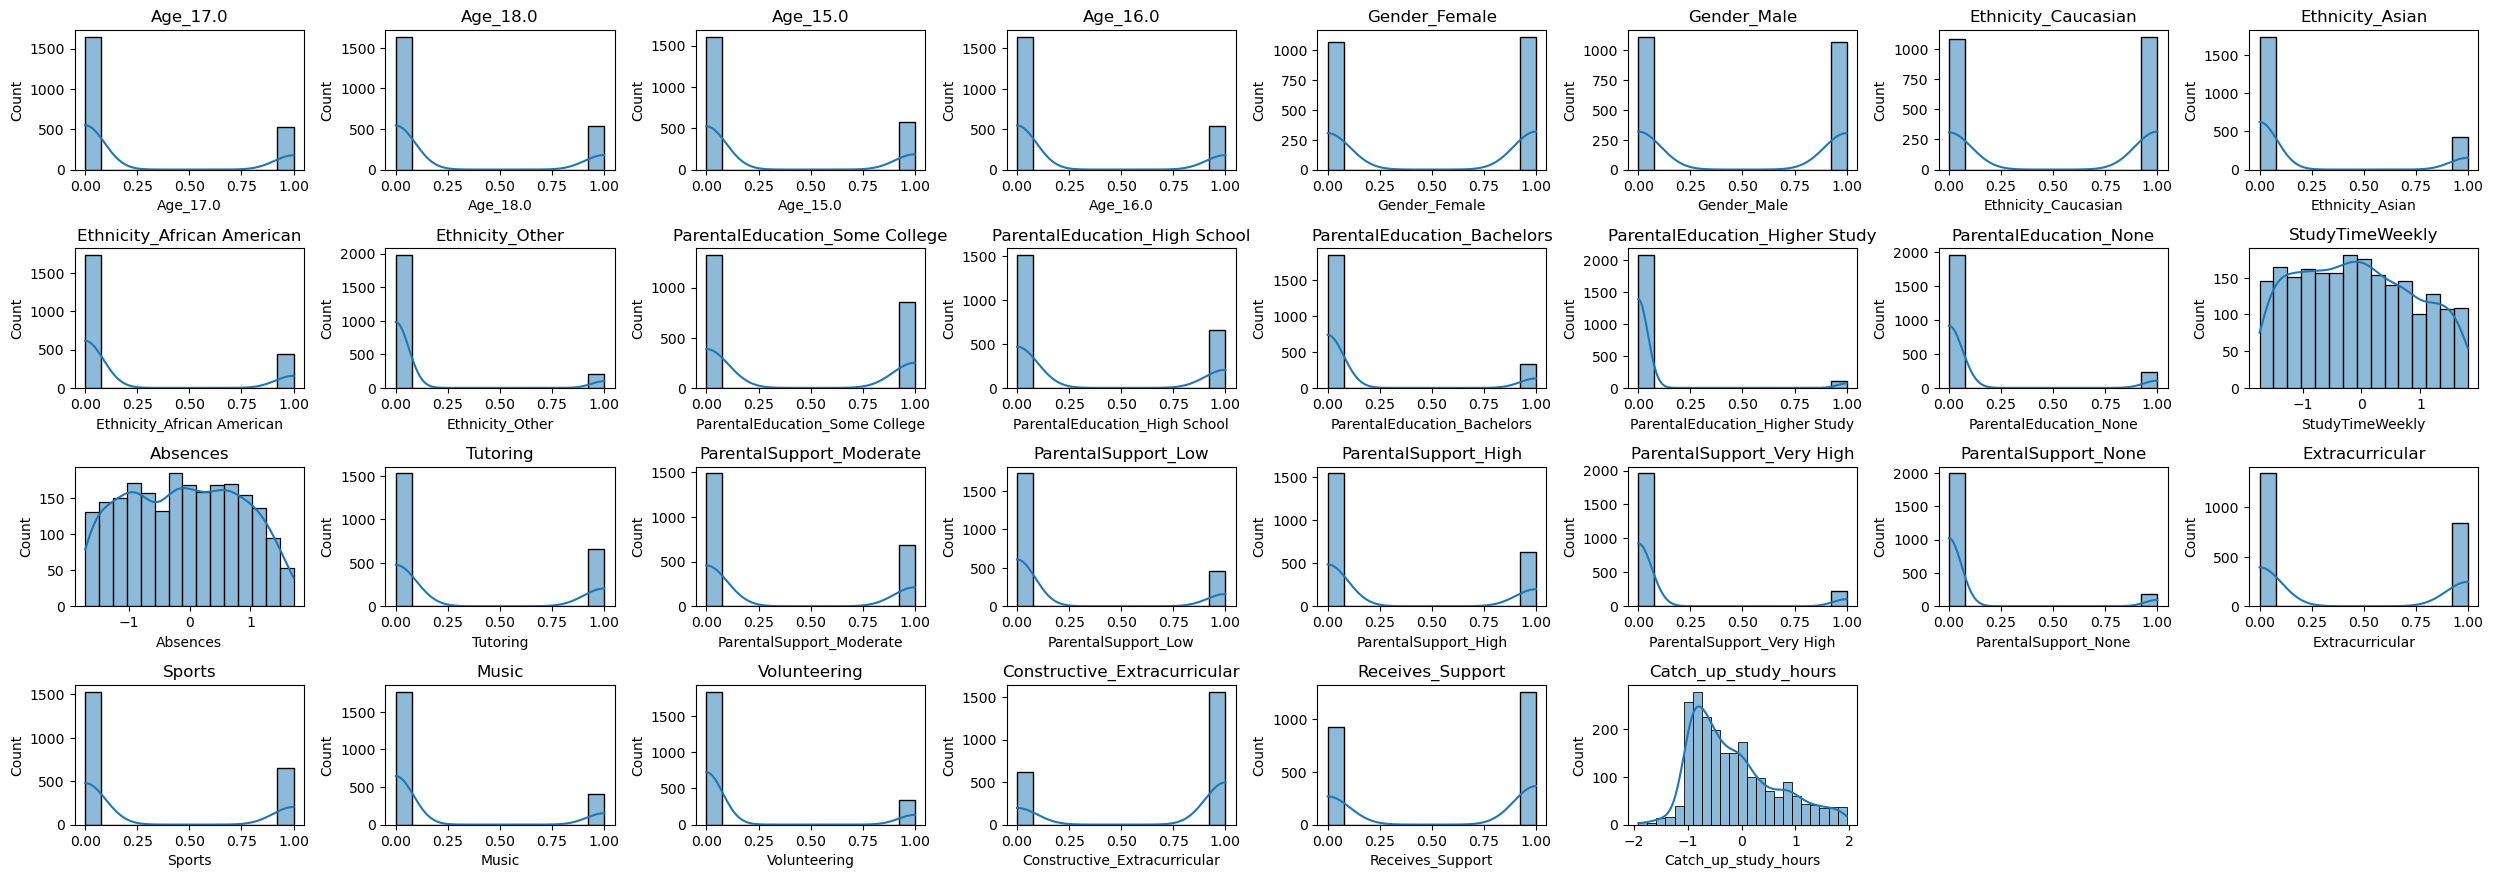

In [17]:
#Looking at the distribution of the features
output_Var = "GPA"
features = df_cleaned.columns.drop(output_Var).tolist()
plt.figure(figsize=(25, 15))
for i, col in enumerate(features):
    plt.subplot(7, 8, i+1)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

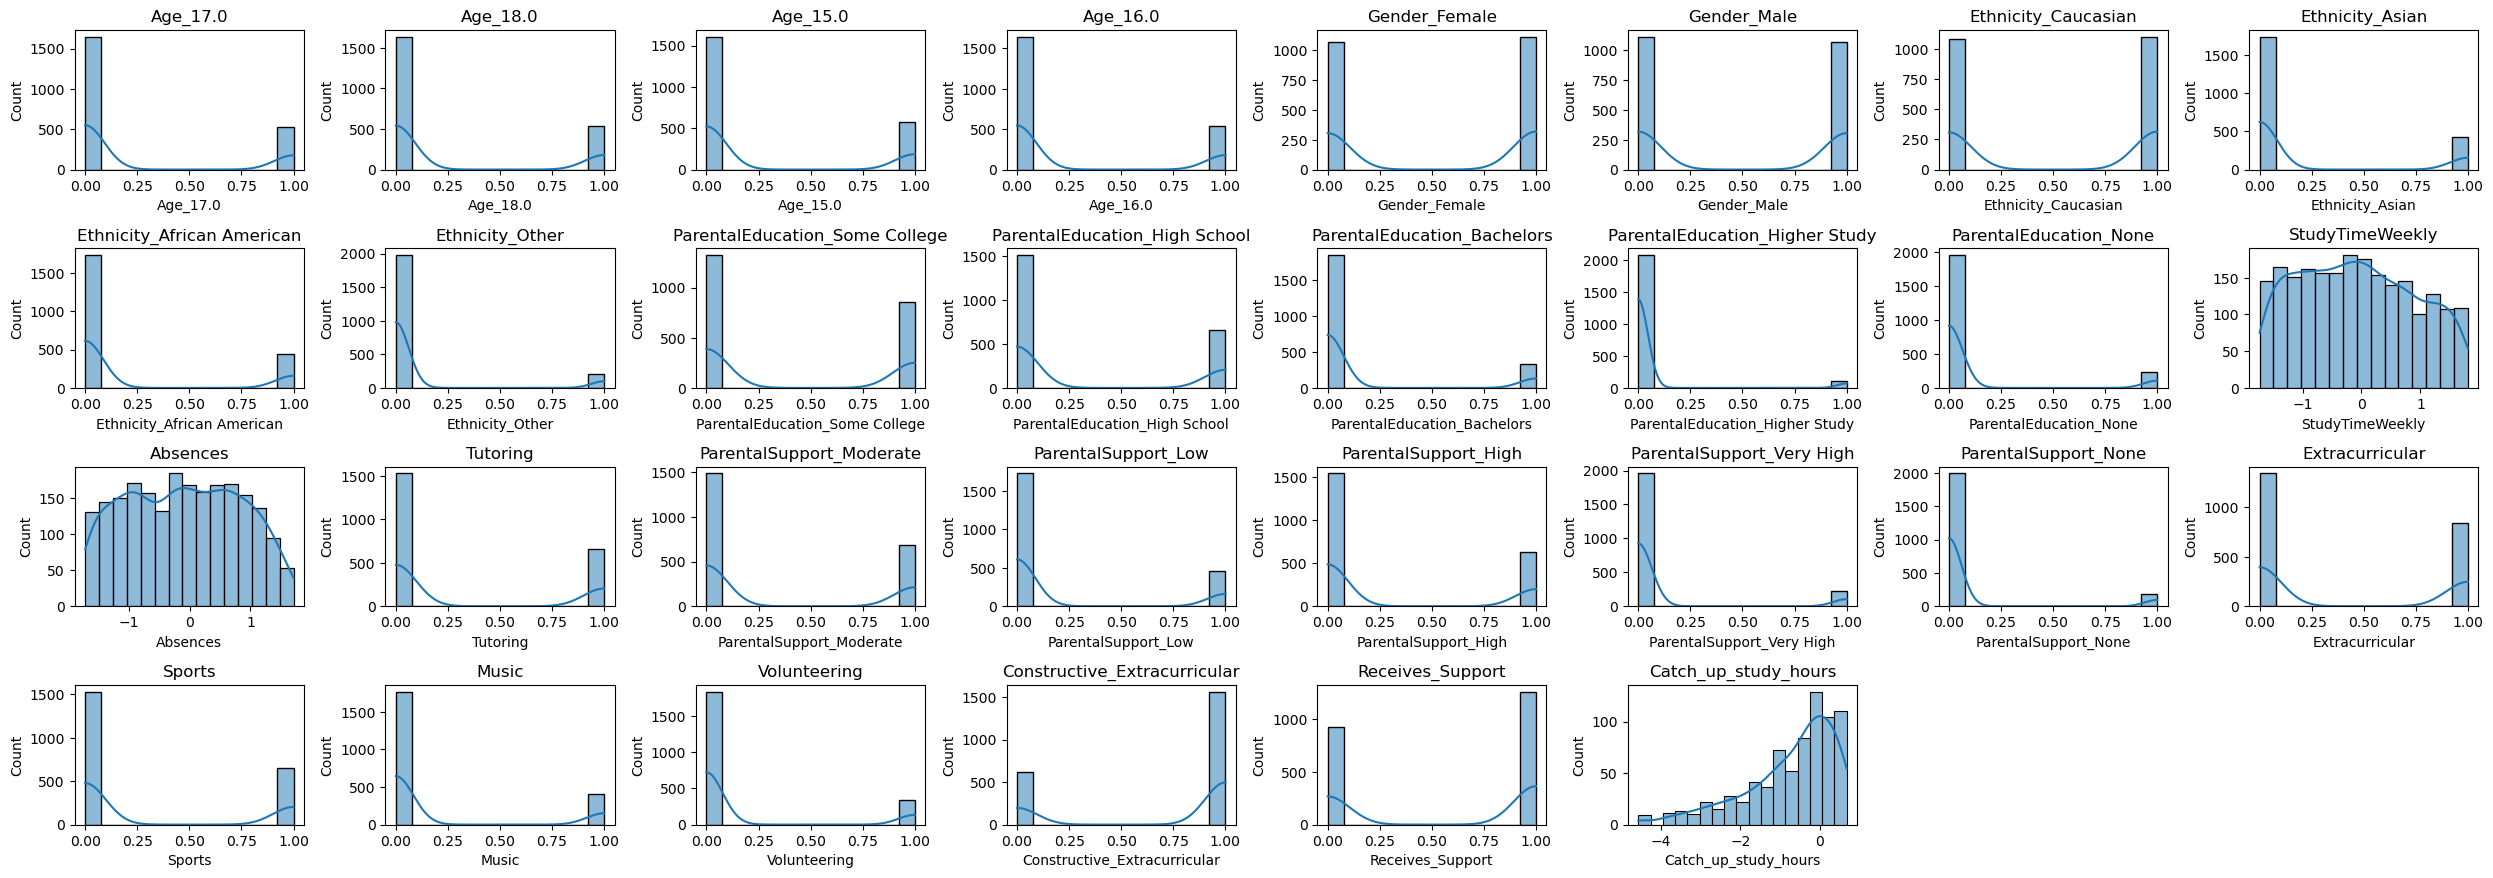

In [18]:
# Reshaping the Catch_up_study_hours to transform its data to be more centered ~ using an log transform
from sklearn.preprocessing import FunctionTransformer

scaled_array = df_cleaned['Catch_up_study_hours']

# Create a log transformer
log_transformer = FunctionTransformer(np.log, validate=True)
# Apply log transform
df_cleaned['Catch_up_study_hours'] = scaled_array.apply(np.log)

# Look at the distribution again
output_Var = "GPA"
features = df_cleaned.columns.drop(output_Var).tolist()
plt.figure(figsize=(25, 15))
for i, col in enumerate(features):
    plt.subplot(7, 8, i+1)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

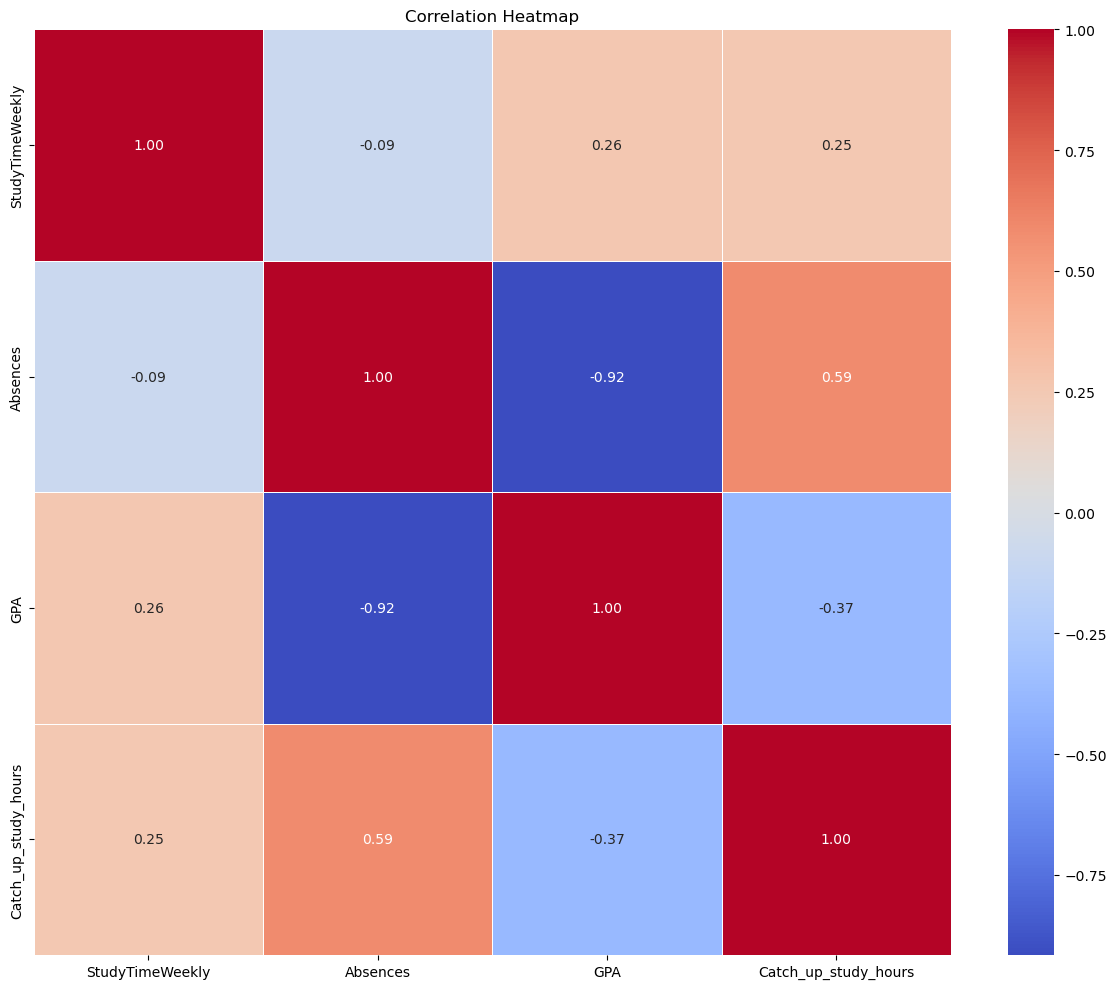

In [19]:

# Viewing the correlation between categorical data
#Generates new correlation heatmap
plt.figure(figsize=(12, 10))
corr = df_cleaned[scalar_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()